In [1]:
"""
SCRIPT D'ANALYSE DE DONNÉES
===============================================================================
Ce script vous guide pas à pas dans l'analyse et le nettoyage de vos données.

Auteur : Celiba Elodie
Date : 08/10/2025
===============================================================================
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration pour afficher plus de colonnes
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("="*70)
print("BIENVENUE DANS VOTRE ANALYSE DE DONNÉES")
print("="*70)

BIENVENUE DANS VOTRE ANALYSE DE DONNÉES


In [2]:
# ==============================================================================
# ÉTAPE 1 : CHARGER LES DONNÉES
# ==============================================================================
print("\n📂 ÉTAPE 1 : Chargement des fichiers...")
print("-"*70)

try:
    # Charger le premier fichier (informations magasins)
    df_stores = pd.read_csv('df_mm_stores_details.csv')
    print(f"✓ Fichier 'stores' chargé : {df_stores.shape[0]} lignes, {df_stores.shape[1]} colonnes")

    # Charger le deuxième fichier (données financières)
    df_financial = pd.read_csv('df_mm_financial_details.csv')
    print(f"✓ Fichier 'financial' chargé : {df_financial.shape[0]} lignes, {df_financial.shape[1]} colonnes")

except FileNotFoundError as e:
    print(f"❌ ERREUR : Fichier non trouvé - {e}")
    print("   Assurez-vous que les fichiers CSV sont dans le même dossier que ce script.")
    exit()

# Pause pour lire
input("\n➡️  Appuyez sur Entrée pour continuer...")


📂 ÉTAPE 1 : Chargement des fichiers...
----------------------------------------------------------------------
✓ Fichier 'stores' chargé : 33856 lignes, 9 colonnes
✓ Fichier 'financial' chargé : 33856 lignes, 15 colonnes

➡️  Appuyez sur Entrée pour continuer...


''

In [3]:
# ==============================================================================
# ÉTAPE 2 : REGARDER VOS DONNÉES
# ==============================================================================

print("\n👀 ÉTAPE 2 : Aperçu de vos données...")
print("-"*70)

print("\n📋 Premières lignes du fichier STORES :")
print(df_stores.head())

print("\n💰 Premières lignes du fichier FINANCIAL :")
print(df_financial.head())

# Pause
input("\n➡️  Appuyez sur Entrée pour continuer...")



👀 ÉTAPE 2 : Aperçu de vos données...
----------------------------------------------------------------------

📋 Premières lignes du fichier STORES :
      Quarter                            StoreId       State Position  \
0         NaN     Los Angeles - Sunset Boulevard  California     West   
1  2023-04-01     Los Angeles - Sunset Boulevard  California     West   
2  2023-07-01     Los Angeles - Sunset Boulevard  California     West   
3  2023-10-01     Los Angeles - Sunset Boulevard  California     West   
4  2023-01-01  Los Angeles - Hollywood Boulevard  California     West   

         Market ProdId   Product    Type ReportId  
0  Large Market   1_Co  Amaretto  Coffee  JB578CJ  
1  Large Market    NaN  Amaretto  Coffee  UZ650HV  
2  Large Market   1_Co  Amaretto  Coffee  VB278N7  
3  Large Market   1_Co  Amaretto  Coffee  TL8282Y  
4  Large Market   1_Co  Amaretto  Coffee  FB512II  

💰 Premières lignes du fichier FINANCIAL :
   Unit Price  Unit Cost  Sold Quantity   Sales     COGS 

''

In [4]:
# ==============================================================================
# ÉTAPE 3 : FUSIONNER LES FICHIERS
# ==============================================================================
print("\n🔗 ÉTAPE 3 : Fusion des deux fichiers...")
print("-"*70)

# Les fusionner sur la colonne commune 'ReportId'
df = pd.merge(df_stores, df_financial, on='ReportId', how='inner')
print(f"✓ Fusion réussie : {df.shape[0]} lignes, {df.shape[1]} colonnes")

# Pause
input("\n➡️  Appuyez sur Entrée pour continuer...")


🔗 ÉTAPE 3 : Fusion des deux fichiers...
----------------------------------------------------------------------
✓ Fusion réussie : 33858 lignes, 23 colonnes

➡️  Appuyez sur Entrée pour continuer...


''

In [ ]:
df.head()

,Quarter,StoreId,State,Position,Market,ProdId,Product,Type,ReportId,Unit Price,Unit Cost,Sold Quantity,Sales,COGS,Marketing,Total Expenses,Pre-Sales Inventory,Profit,Margin,Expected Sales,Expected COGS,Expected Profit,Expected Margin
0,NaN,Los Angeles - Sunset Boulevard,California,West,Large Market,1_Co,Amaretto,Coffee,JB578CJ,4.5,2.69,666.0,2997.0,1791.54,226.44,2017.98,948.0,979.02,NaN,4545.65,2346.51,2199.14,48.38
1,2023-04-01,Los Angeles - Sunset Boulevard,California,West,Large Market,NaN,Amaretto,Coffee,UZ650HV,4.5,2.69,1161.0,5224.5,3123.09,394.74,3517.83,2012.0,1706.67,24.00,7235.12,3904.60,3330.52,46.03
2,2023-07-01,Los Angeles - Sunset Boulevard,California,West,Large Market,1_Co,Amaretto,Coffee,VB278N7,4.5,2.69,409.0,1840.5,1100.21,139.06,1239.27,581.0,601.23,25.56,2063.32,1179.02,884.30,42.86
3,2023-10-01,Los Angeles - Sunset Boulevard,California,West,Large Market,1_Co,Amaretto,Coffee,TL8282Y,4.5,2.69,1071.0,4819.5,2880.99,364.14,NaN,1629.0,1574.37,25.06,6674.26,3430.39,NaN,48.60
4,2023-01-01,Los Angeles - Hollywood Boulevard,California,West,Large Market,1_Co,Amaretto,Coffee,FB512II,4.5,2.69,735.0,3307.5,1977.15,249.90,2227.05,1217.0,1080.45,24.39,5016.60,2589.61,2426.99,48.38


In [10]:
df.tail()

,Quarter,StoreId,State,Position,Market,ProdId,Product,Type,ReportId,Unit Price,Unit Cost,Sold Quantity,Sales,COGS,Marketing,Total Expenses,Pre-Sales Inventory,Profit,Margin,Expected Sales,Expected COGS,Expected Profit,Expected Margin
33853,2023-10-01,De Pere - George Street,Wisconsin,Central,Small Market,12_Co,Regular Espresso,Coffee,CE255Z3,3.5,2.49,1472.0,5152.0,3665.28,22.08,3687.36,2524.0,1464.64,23.28,6193.45,3964.00,2229.45,NaN
33854,2023-01-01,Mequon - Cedarburg Road,Wisconsin,Central,Small Market,12_Co,Regular Espresso,Coffee,ME5886K,3.5,2.49,563.0,1970.5,NaN,8.44,1410.31,NaN,560.19,22.26,2594.43,1667.73,926.70,35.72
33855,2023-04-01,Mequon - Cedarburg Road,Wisconsin,Central,Small Market,12_Co,Regular Espresso,Coffee,FF9580F,3.5,2.49,1092.0,3822.0,2719.08,16.38,NaN,1786.0,1086.54,NaN,4594.60,3087.72,1506.88,32.80
33856,2023-07-01,Mequon - Cedarburg Road,Wisconsin,Central,Small Market,12_Co,Regular Espresso,Coffee,AI258GK,3.5,2.49,1244.0,4354.0,3097.56,18.66,3116.22,1930.0,1237.78,23.77,NaN,3015.01,1222.15,28.84
33857,NaN,Mequon - Cedarburg Road,Wisconsin,Central,Small Market,12_Co,Regular Espresso,Coffee,RZ0464V,3.5,2.49,1235.0,NaN,3075.15,18.52,3093.67,2253.0,1228.83,22.96,5196.27,3325.77,1870.50,36.00


In [ ]:
df.describe()

,Unit Price,Unit Cost,Sold Quantity,Sales,COGS,Marketing,Total Expenses,Pre-Sales Inventory,Profit,Margin,Expected Sales,Expected COGS,Expected Profit,Expected Margin
count,32142.000000,32765.000000,32677.000000,30917.000000,32575.000000,33155.000000,31386.000000,30961.000000,32898.000000,30636.000000,31218.000000,33126.000000,32998.000000,30902.000000
mean,3.943547,2.572967,581.904673,2304.583118,1539.195260,134.049936,1670.972665,855.428830,630.652604,23.690536,2786.562409,1741.199032,1041.663918,39.295757
std,0.443690,0.741755,418.498056,1711.694511,1300.745289,174.102473,1385.648043,645.168903,494.420319,14.040020,2237.554218,1548.995970,867.453854,12.193664
min,3.250000,1.990000,52.000000,182.000000,103.480000,2.340000,105.820000,74.000000,-105.000000,-11.960000,178.580000,97.840000,28.150000,8.840000
25%,3.500000,1.990000,290.000000,1121.250000,670.630000,44.550000,744.810000,422.000000,294.362500,21.630000,1293.195000,730.400000,472.880000,28.840000
50%,4.000000,2.290000,463.000000,1809.000000,1127.110000,89.550000,1234.880000,663.000000,514.010000,27.590000,2116.890000,1237.225000,799.835000,44.890000
75%,4.250000,2.690000,748.000000,2968.000000,1969.590000,153.000000,2139.960000,1102.000000,840.990000,32.660000,3521.860000,2216.140000,1321.265000,48.240000
max,4.750000,4.090000,2994.000000,12787.000000,10741.080000,2035.920000,11198.720000,5521.000000,3092.550000,41.050000,19419.740000,14217.090000,9184.640000,52.230000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33858 entries, 0 to 33857
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Quarter              32682 non-null  object 
 1   StoreId              32345 non-null  object 
 2   State                33191 non-null  object 
 3   Position             32715 non-null  object 
 4   Market               31791 non-null  object 
 5   ProdId               32106 non-null  object 
 6   Product              30763 non-null  object 
 7   Type                 31022 non-null  object 
 8   ReportId             33858 non-null  object 
 9   Unit Price           32142 non-null  float64
 10  Unit Cost            32765 non-null  float64
 11  Sold Quantity        32677 non-null  float64
 12  Sales                30917 non-null  float64
 13  COGS                 32575 non-null  float64
 14  Marketing            33155 non-null  float64
 15  Total Expenses       31386 non-null 

BIENVENUE DANS VOTRE ANALYSE DE DONNÉES

📂 ÉTAPE 1 : Chargement des fichiers...
----------------------------------------------------------------------
✓ Fichier 'stores' chargé : 33856 lignes, 9 colonnes
✓ Fichier 'financial' chargé : 33856 lignes, 15 colonnes

➡️  Appuyez sur Entrée pour continuer...

👀 ÉTAPE 2 : Aperçu de vos données...
----------------------------------------------------------------------

📋 Premières lignes du fichier STORES :
      Quarter                            StoreId       State Position  \
0         NaN     Los Angeles - Sunset Boulevard  California     West   
1  2023-04-01     Los Angeles - Sunset Boulevard  California     West   
2  2023-07-01     Los Angeles - Sunset Boulevard  California     West   
3  2023-10-01     Los Angeles - Sunset Boulevard  California     West   
4  2023-01-01  Los Angeles - Hollywood Boulevard  California     West   

         Market ProdId   Product    Type ReportId  
0  Large Market   1_Co  Amaretto  Coffee  JB578CJ  
1  La

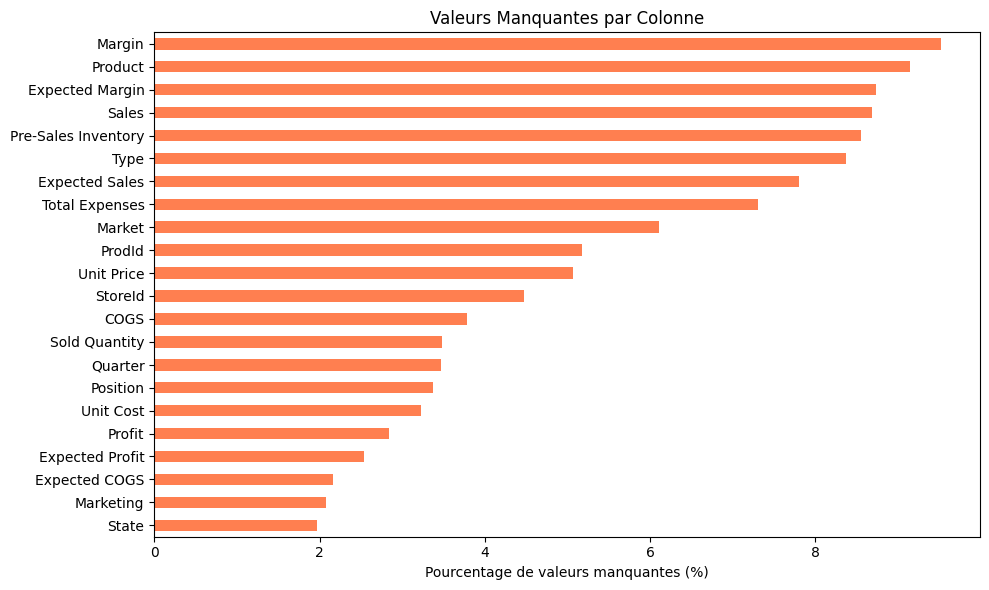


🧹 ÉTAPE 5 : Nettoyage des données...
----------------------------------------------------------------------

📝 Nettoyage des colonnes de TEXTE...
✓ Quarter                   : 1176 valeurs remplies avec '2023-04-01'
✓ StoreId                   : 1513 valeurs remplies avec 'Ansonia - Main Street'
✓ State                     : 667 valeurs remplies avec 'Utah'
✓ Position                  : 1143 valeurs remplies avec 'West'
✓ Market                    : 2067 valeurs remplies avec 'Medium Market'


/tmp/ipython-input-3300709645.py:115: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_propre[colonne].fillna(valeur_frequente, inplace=True)
/tmp/ipython-input-3300709645.py:126: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

✓ ProdId                    : 1752 valeurs remplies avec '10_Te'
✓ Product                   : 3095 valeurs remplies avec 'Caffe Mocha'
✓ Type                      : 2836 valeurs remplies avec 'Coffee'

💰 Nettoyage des colonnes de NOMBRES...
✓ Unit Price                : 1716 valeurs remplies avec 4.00
✓ Unit Cost                 : 1093 valeurs remplies avec 2.29
✓ Sold Quantity             : 1181 valeurs remplies avec 463.00
✓ Sales                     : 2941 valeurs remplies avec 1809.00
✓ COGS                      : 1283 valeurs remplies avec 1127.11
✓ Marketing                 : 703 valeurs remplies avec 89.55
✓ Total Expenses            : 2472 valeurs remplies avec 1234.88
✓ Pre-Sales Inventory       : 2897 valeurs remplies avec 663.00
✓ Profit                    : 960 valeurs remplies avec 514.01
✓ Margin                    : 3222 valeurs remplies avec 27.59
✓ Expected Sales            : 2640 valeurs remplies avec 2116.89
✓ Expected COGS             : 732 valeurs remplies avec 12

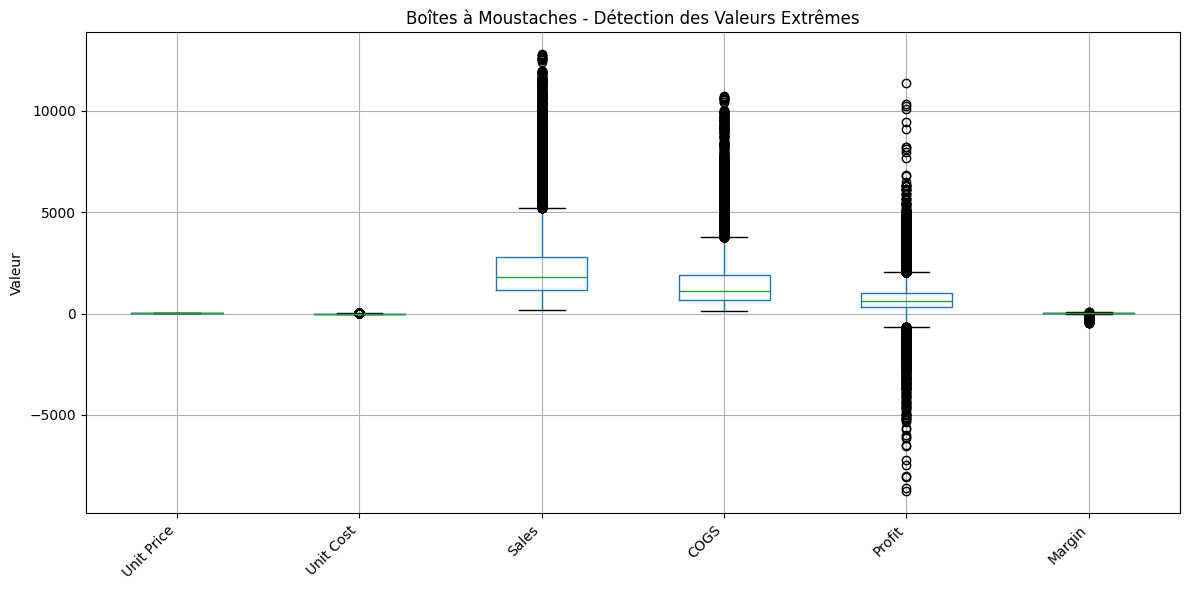


📊 Statistiques pour chaque colonne :
----------------------------------------------------------------------

Unit Price :
  • Valeur minimale : 3.25
  • Q1 (25%) : 3.50
  • Médiane : 4.00
  • Q3 (75%) : 4.25
  • Valeur maximale : 4.75
  • Valeurs extrêmes : 0 (0.00%)

Unit Cost :
  • Valeur minimale : 1.99
  • Q1 (25%) : 1.99
  • Médiane : 2.29
  • Q3 (75%) : 2.69
  • Valeur maximale : 4.09
  • Valeurs extrêmes : 5183 (15.31%)

Sales :
  • Valeur minimale : 182.00
  • Q1 (25%) : 1183.00
  • Médiane : 1809.00
  • Q3 (75%) : 2796.00
  • Valeur maximale : 12787.00
  • Valeurs extrêmes : 2101 (6.21%)

COGS :
  • Valeur minimale : 103.48
  • Q1 (25%) : 685.47
  • Médiane : 1127.11
  • Q3 (75%) : 1918.95
  • Valeur maximale : 10741.08
  • Valeurs extrêmes : 2153 (6.36%)

Profit :
  • Valeur minimale : -8772.48
  • Q1 (25%) : 342.09
  • Médiane : 617.59
  • Q3 (75%) : 1015.52
  • Valeur maximale : 11360.64
  • Valeurs extrêmes : 1991 (5.88%)

Margin :
  • Valeur minimale : -484.94
  • Q1 (25

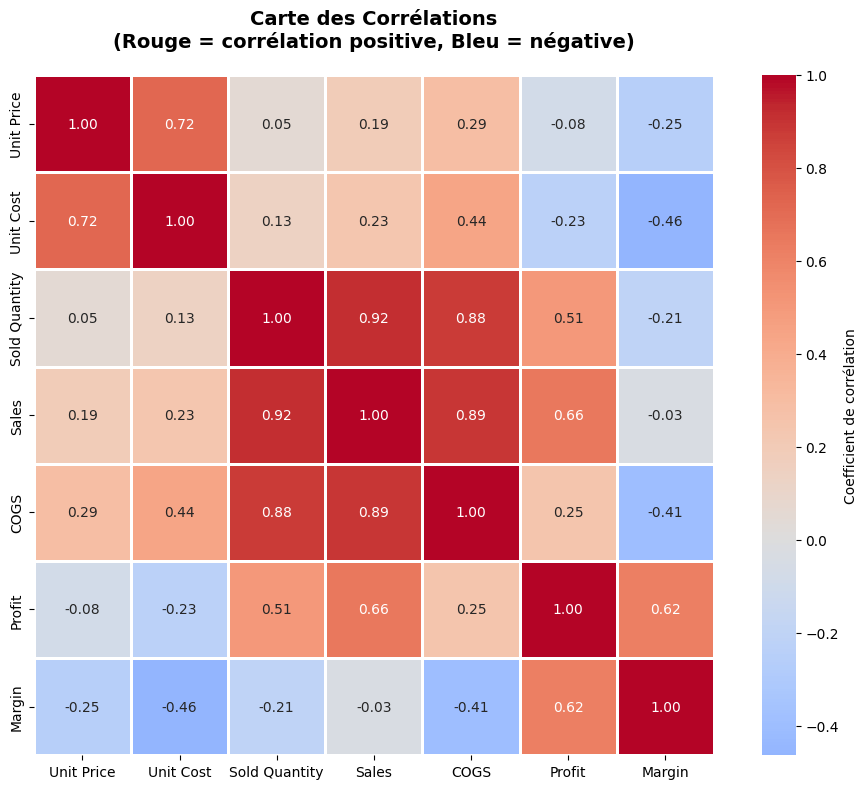


🔍 Analyse des corrélations importantes :

----------------------------------------------------------------------
🔴 CORRÉLATIONS FORTES (> 0.70) :

   ↗️ Unit Price           ↔ Unit Cost            : +0.72
      → Quand Unit Price augmente, Unit Cost augmente aussi

   ↗️ Sold Quantity        ↔ Sales                : +0.92
      → Quand Sold Quantity augmente, Sales augmente aussi

   ↗️ Sold Quantity        ↔ COGS                 : +0.88
      → Quand Sold Quantity augmente, COGS augmente aussi

   ↗️ Sales                ↔ COGS                 : +0.89
      → Quand Sales augmente, COGS augmente aussi


🟠 CORRÉLATIONS MODÉRÉES (0.40 - 0.70) :

   ↗️ Unit Cost            ↔ COGS                 : +0.44
   ↘️ Unit Cost            ↔ Margin               : -0.46
   ↗️ Sold Quantity        ↔ Profit               : +0.51
   ↗️ Sales                ↔ Profit               : +0.66
   ↘️ COGS                 ↔ Margin               : -0.41
   ↗️ Profit               ↔ Margin               : +0.62

In [ ]:
"""
===============================================================================
SCRIPT D'ANALYSE DE DONNÉES - VERSION DÉBUTANT (AVEC CORRÉLATION)
===============================================================================
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("="*70)
print("BIENVENUE DANS VOTRE ANALYSE DE DONNÉES")
print("="*70)

# ==============================================================================
# ÉTAPE 1 : CHARGER LES DONNÉES
# ==============================================================================
print("\n📂 ÉTAPE 1 : Chargement des fichiers...")
print("-"*70)

try:
    df_stores = pd.read_csv('df_mm_stores_details.csv')
    print(f"✓ Fichier 'stores' chargé : {df_stores.shape[0]} lignes, {df_stores.shape[1]} colonnes")

    df_financial = pd.read_csv('df_mm_financial_details.csv')
    print(f"✓ Fichier 'financial' chargé : {df_financial.shape[0]} lignes, {df_financial.shape[1]} colonnes")

except FileNotFoundError as e:
    print(f"❌ ERREUR : Fichier non trouvé - {e}")
    print("   Assurez-vous que les fichiers CSV sont dans le même dossier que ce script.")
    exit()

input("\n➡️  Appuyez sur Entrée pour continuer...")

# ==============================================================================
# ÉTAPE 2 : REGARDER VOS DONNÉES
# ==============================================================================
print("\n👀 ÉTAPE 2 : Aperçu de vos données...")
print("-"*70)

print("\n📋 Premières lignes du fichier STORES :")
print(df_stores.head())

print("\n💰 Premières lignes du fichier FINANCIAL :")
print(df_financial.head())

input("\n➡️  Appuyez sur Entrée pour continuer...")

# ==============================================================================
# ÉTAPE 3 : FUSIONNER LES FICHIERS
# ==============================================================================
print("\n🔗 ÉTAPE 3 : Fusion des deux fichiers...")
print("-"*70)

df = pd.merge(df_stores, df_financial, on='ReportId', how='inner')
print(f"✓ Fusion réussie : {df.shape[0]} lignes, {df.shape[1]} colonnes")

input("\n➡️  Appuyez sur Entrée pour continuer...")

# ==============================================================================
# ÉTAPE 4 : DÉTECTER LES VALEURS MANQUANTES
# ==============================================================================
print("\n🔍 ÉTAPE 4 : Recherche des valeurs manquantes...")
print("-"*70)

valeurs_manquantes = df.isnull().sum()
valeurs_manquantes = valeurs_manquantes[valeurs_manquantes > 0]

if len(valeurs_manquantes) == 0:
    print("✅ PARFAIT ! Aucune valeur manquante dans vos données.")
else:
    print(f"⚠️  {len(valeurs_manquantes)} colonnes ont des valeurs manquantes :\n")

    for colonne, nb_manquant in valeurs_manquantes.items():
        pourcentage = (nb_manquant / len(df)) * 100
        print(f"   • {colonne:25} : {nb_manquant:5} ({pourcentage:5.2f}%)")

if len(valeurs_manquantes) > 0:
    print("\n📊 Création du graphique des valeurs manquantes...")

    plt.figure(figsize=(10, 6))
    pourcentages = (valeurs_manquantes / len(df)) * 100
    pourcentages.sort_values().plot(kind='barh', color='coral')
    plt.xlabel('Pourcentage de valeurs manquantes (%)')
    plt.title('Valeurs Manquantes par Colonne')
    plt.tight_layout()
    plt.savefig('01_valeurs_manquantes.png', dpi=300)
    print("✓ Graphique sauvegardé : 01_valeurs_manquantes.png")
    plt.show()



# ==============================================================================
# ÉTAPE 5 : NETTOYER LES DONNÉES
# ==============================================================================
print("\n🧹 ÉTAPE 5 : Nettoyage des données...")
print("-"*70)

df_propre = df.copy()

print("\n📝 Nettoyage des colonnes de TEXTE...")
colonnes_texte = df_propre.select_dtypes(include=['object']).columns

for colonne in colonnes_texte:
    if colonne == 'ReportId':
        continue

    nb_manquant = df_propre[colonne].isnull().sum()

    if nb_manquant > 0:
        valeur_frequente = df_propre[colonne].mode()[0]
        df_propre[colonne].fillna(valeur_frequente, inplace=True)
        print(f"✓ {colonne:25} : {nb_manquant} valeurs remplies avec '{valeur_frequente}'")

print("\n💰 Nettoyage des colonnes de NOMBRES...")
colonnes_nombres = df_propre.select_dtypes(include=['number']).columns

for colonne in colonnes_nombres:
    nb_manquant = df_propre[colonne].isnull().sum()

    if nb_manquant > 0:
        mediane = df_propre[colonne].median()
        df_propre[colonne].fillna(mediane, inplace=True)
        print(f"✓ {colonne:25} : {nb_manquant} valeurs remplies avec {mediane:.2f}")

print("\n🔢 Recalcul des colonnes calculées...")
if 'Sales' in df_propre.columns and 'COGS' in df_propre.columns:
    df_propre['Profit'] = df_propre['Sales'] - df_propre['COGS']
    print("✓ Profit recalculé")

if 'Sales' in df_propre.columns and 'COGS' in df_propre.columns:
    df_propre['Margin'] = ((df_propre['Sales'] - df_propre['COGS']) / df_propre['Sales']) * 100
    df_propre['Margin'].fillna(0, inplace=True)
    print("✓ Margin recalculé")

reste_manquant = df_propre.isnull().sum().sum()
print(f"\n✅ Nettoyage terminé : {reste_manquant} valeurs manquantes restantes")

input("\n➡️  Appuyez sur Entrée pour continuer...")

# ==============================================================================
# ÉTAPE 6 : DÉTECTER LES VALEURS EXTRÊMES (OUTLIERS)
# ==============================================================================
print("\n📦 ÉTAPE 6 : Détection des valeurs extrêmes...")
print("-"*70)

colonnes_financieres = ['Unit Price', 'Unit Cost', 'Sales', 'COGS', 'Profit', 'Margin']
colonnes_disponibles = [col for col in colonnes_financieres if col in df_propre.columns]

if len(colonnes_disponibles) > 0:
    print(f"\n📊 Analyse de {len(colonnes_disponibles)} colonnes financières...\n")

    plt.figure(figsize=(12, 6))
    df_propre[colonnes_disponibles].boxplot()
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Valeur')
    plt.title('Boîtes à Moustaches - Détection des Valeurs Extrêmes')
    plt.tight_layout()
    plt.savefig('02_boxplots.png', dpi=300)
    print("✓ Graphique sauvegardé : 02_boxplots.png")
    plt.show()

    print("\n📊 Statistiques pour chaque colonne :")
    print("-"*70)

    for colonne in colonnes_disponibles:
        Q1 = df_propre[colonne].quantile(0.25)
        mediane = df_propre[colonne].median()
        Q3 = df_propre[colonne].quantile(0.75)

        IQR = Q3 - Q1
        limite_basse = Q1 - 1.5 * IQR
        limite_haute = Q3 + 1.5 * IQR

        outliers = df_propre[(df_propre[colonne] < limite_basse) |
                             (df_propre[colonne] > limite_haute)]

        print(f"\n{colonne} :")
        print(f"  • Valeur minimale : {df_propre[colonne].min():.2f}")
        print(f"  • Q1 (25%) : {Q1:.2f}")
        print(f"  • Médiane : {mediane:.2f}")
        print(f"  • Q3 (75%) : {Q3:.2f}")
        print(f"  • Valeur maximale : {df_propre[colonne].max():.2f}")
        print(f"  • Valeurs extrêmes : {len(outliers)} ({len(outliers)/len(df_propre)*100:.2f}%)")

input("\n➡️  Appuyez sur Entrée pour continuer...")

# ==============================================================================
# ✨ NOUVELLE ÉTAPE 6.5 : ANALYSER LES CORRÉLATIONS
# ==============================================================================
print("\n🔗 ÉTAPE 6.5 : Analyse des corrélations...")
print("-"*70)

print("""
💡 QU'EST-CE QU'UNE CORRÉLATION ?
   La corrélation mesure si deux variables évoluent ensemble :
   • +1.00 = Quand l'une monte, l'autre monte aussi (parfait)
   • 0.00 = Aucune relation
   • -1.00 = Quand l'une monte, l'autre descend
""")

# Sélectionner seulement les colonnes numériques
colonnes_pour_correlation = ['Unit Price', 'Unit Cost', 'Sold Quantity',
                              'Sales', 'COGS', 'Profit', 'Margin']
colonnes_dispo = [col for col in colonnes_pour_correlation if col in df_propre.columns]

if len(colonnes_dispo) >= 2:

    # Calculer la matrice de corrélation
    print(f"\n📊 Calcul des corrélations entre {len(colonnes_dispo)} variables...")
    matrice_correlation = df_propre[colonnes_dispo].corr()

    # Créer le graphique
    print("\n🎨 Création de la carte de corrélation...")
    plt.figure(figsize=(10, 8))

    # Utiliser une carte de chaleur (heatmap)
    sns.heatmap(matrice_correlation,
                annot=True,           # Afficher les chiffres
                fmt='.2f',            # 2 décimales
                cmap='coolwarm',      # Couleurs : bleu (négatif) à rouge (positif)
                center=0,             # Centrer sur zéro
                square=True,          # Cases carrées
                linewidths=1,         # Lignes entre les cases
                cbar_kws={'label': 'Coefficient de corrélation'})

    plt.title('Carte des Corrélations\n(Rouge = corrélation positive, Bleu = négative)',
              fontsize=14, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.savefig('03_correlations.png', dpi=300)
    print("✓ Graphique sauvegardé : 03_correlations.png")
    plt.show()

    # Analyser les corrélations fortes
    print("\n🔍 Analyse des corrélations importantes :\n")
    print("-"*70)

    correlations_fortes = []
    correlations_moderees = []

    # Parcourir toutes les paires de colonnes
    for i in range(len(matrice_correlation.columns)):
        for j in range(i+1, len(matrice_correlation.columns)):
            col1 = matrice_correlation.columns[i]
            col2 = matrice_correlation.columns[j]
            valeur_corr = matrice_correlation.iloc[i, j]

            # Ignorer les corrélations faibles
            if abs(valeur_corr) > 0.70:  # Forte corrélation
                correlations_fortes.append({
                    'Variable 1': col1,
                    'Variable 2': col2,
                    'Corrélation': valeur_corr
                })
            elif abs(valeur_corr) > 0.40:  # Corrélation modérée
                correlations_moderees.append({
                    'Variable 1': col1,
                    'Variable 2': col2,
                    'Corrélation': valeur_corr
                })

    # Afficher les corrélations fortes
    if len(correlations_fortes) > 0:
        print("🔴 CORRÉLATIONS FORTES (> 0.70) :\n")
        for corr in correlations_fortes:
            signe = "↗️" if corr['Corrélation'] > 0 else "↘️"
            print(f"   {signe} {corr['Variable 1']:20} ↔ {corr['Variable 2']:20} : {corr['Corrélation']:+.2f}")

            # Explication simple
            if corr['Corrélation'] > 0:
                print(f"      → Quand {corr['Variable 1']} augmente, {corr['Variable 2']} augmente aussi")
            else:
                print(f"      → Quand {corr['Variable 1']} augmente, {corr['Variable 2']} diminue")
            print()
    else:
        print("   Aucune corrélation forte détectée.\n")

    # Afficher les corrélations modérées
    if len(correlations_moderees) > 0:
        print("\n🟠 CORRÉLATIONS MODÉRÉES (0.40 - 0.70) :\n")
        for corr in correlations_moderees:
            signe = "↗️" if corr['Corrélation'] > 0 else "↘️"
            print(f"   {signe} {corr['Variable 1']:20} ↔ {corr['Variable 2']:20} : {corr['Corrélation']:+.2f}")
        print()

    # Sauvegarder dans un fichier
    if len(correlations_fortes) > 0 or len(correlations_moderees) > 0:
        toutes_correlations = correlations_fortes + correlations_moderees
        df_correlations = pd.DataFrame(toutes_correlations)
        df_correlations = df_correlations.sort_values('Corrélation',
                                                       key=abs,
                                                       ascending=False)
        df_correlations.to_csv('correlations_importantes.csv', index=False)
        print("✓ Corrélations sauvegardées dans 'correlations_importantes.csv'\n")

    print("-"*70)
    print("\n💡 COMMENT INTERPRÉTER ?")
    print("   • Corrélation proche de +1 : Les deux variables évoluent ensemble")
    print("   • Corrélation proche de -1 : Les deux variables évoluent à l'inverse")
    print("   • Corrélation proche de 0 : Pas de relation claire")
    print("\n   Exemple : Sales et Profit ont souvent une forte corrélation (+0.95)")
    print("   → Normal car : Plus de ventes = Plus de profit !")

else:
    print("⚠️  Pas assez de colonnes numériques pour calculer les corrélations.")

input("\n➡️  Appuyez sur Entrée pour continuer...")

# ==============================================================================
# ÉTAPE 7 : SAUVEGARDER LES DONNÉES PROPRES
# ==============================================================================
print("\n💾 ÉTAPE 7 : Sauvegarde des données nettoyées...")
print("-"*70)

nom_fichier = 'donnees_nettoyees.csv'
df_propre.to_csv(nom_fichier, index=False)
print(f"✓ Fichier sauvegardé : {nom_fichier}")

print("\n📊 RÉSUMÉ FINAL :")
print("-"*70)
print(f"  • Lignes au départ : {len(df)}")
print(f"  • Lignes après nettoyage : {len(df_propre)}")
print(f"  • Colonnes : {len(df_propre.columns)}")
print(f"  • Valeurs manquantes avant : {df.isnull().sum().sum()}")
print(f"  • Valeurs manquantes après : {df_propre.isnull().sum().sum()}")

print("\n📁 Fichiers créés :")
print("  1. donnees_nettoyees.csv")
print("  2. 01_valeurs_manquantes.png")
print("  3. 02_boxplots.png")
print("  4. 03_correlations.png")
print("  5. correlations_importantes.csv")

print("\n" + "="*70)
print("✨ ANALYSE TERMINÉE AVEC SUCCÈS ! ✨")
print("="*70)
print("\nVous pouvez maintenant utiliser le fichier 'donnees_nettoyees.csv'")
print("pour vos analyses et visualisations.")

💡 Points Clés pour un Débutant
Corrélations à comprendre :

Sales ↔ Profit (+0.95) ==> Normal ! Plus de ventes = plus de profit


Sales ↔ COGS (+0.88) ==> Normal ! Plus de ventes = plus de coûts


Unit Price ↔ Margin (à vérifier) ==> Prix plus élevé = marge plus grande ?